<a href="https://colab.research.google.com/github/M20Jay/Data-Science-Portfolio/blob/main/Customer-Churn-Prediction-ABT-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Load the dataset
path = "/content/drive/MyDrive/Python Dataset/Datasets/#2320035.xlsx"
data = pd.read_excel(path)
print(f"Dataset shape: {data.shape}")
print("\nColumn information:")
for col in data.columns:
    print(f"- {col}: {data[col].dtype}")

Dataset shape: (5000, 14)

Column information:
- RowNumber: int64
- CustomerId: int64
- Surname: object
- CreditScore: float64
- Geography: object
- Gender: object
- Age: float64
- Tenure: int64
- Balance: float64
- NumOfProducts: int64
- HasCrCard: int64
- IsActiveMember: int64
- EstimatedSalary: float64
- Exited: int64


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_percent = missing_values / len(data) * 100

print("\nMissing values per column:")
for col, missing in zip(missing_values.index, missing_values.values):
    if missing > 0:
        print(f"- {col}: {missing} ({missing_percent[col]:.2f}%)")


Missing values per column:
- CreditScore: 90 (1.80%)
- Age: 51 (1.02%)
- EstimatedSalary: 89 (1.78%)


In [ ]:
# Impute missing values
num_cols = ['CreditScore', 'Age', 'EstimatedSalary']
num_imputer = SimpleImputer(strategy='median')
data[num_cols] = num_imputer.fit_transform(data[num_cols])

# Verify no missing values remain
print("Missing values after imputation:")
print(data[num_cols].isnull().sum())

Missing values after imputation:
CreditScore        0
Age                0
EstimatedSalary    0
dtype: int64


In [ ]:
# 4. Generate Statistics for Continuous Features
# Define continuous columns
continuous_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Create empty dataframe for continuous stats
continuous_stats = pd.DataFrame(columns=['Feature', 'Count', '% Miss.', 'Min', '1st Qrt.',
                                       'Mean', 'Median', '3rd Qrt.', 'Max', 'Std. Dev.'])

# Calculate statistics for each column
for col in continuous_cols:
    # Get non-missing values
    col_data = data[col].dropna()

    # Calculate statistics
    count = len(col_data)
    missing = len(data) - count
    missing_pct = f"{missing / len(data) * 100:.2f}%"
    min_val = col_data.min()
    q1 = col_data.quantile(0.25)
    mean_val = col_data.mean()
    median_val = col_data.median()
    q3 = col_data.quantile(0.75)
    max_val = col_data.max()
    std_dev = col_data.std()

    # Add row to results
    stats_dict = {
        'Feature': col,
        'Count': count,
        '% Miss.': missing_pct,
        'Min': min_val,
        '1st Qrt.': q1,
        'Mean': mean_val,
        'Median': median_val,
        '3rd Qrt.': q3,
        'Max': max_val,
        'Std. Dev.': std_dev
    }
    continuous_stats = pd.concat([continuous_stats, pd.DataFrame([stats_dict])], ignore_index=True)

# Display continuous stats
print("Statistics for continuous features:")
print(continuous_stats)

Statistics for continuous features:
           Feature Count % Miss.        Min   1st Qrt.           Mean  \
0      CreditScore  5000   0.00%  54.625000    584.000     725.505850   
1              Age  5000   0.00%   5.000000     32.000      39.473800   
2           Tenure  5000   0.00%   0.000000      3.000       5.043400   
3          Balance  5000   0.00%   0.000000      0.000   75754.957486   
4    NumOfProducts  5000   0.00%   1.000000      1.000       1.529200   
5  EstimatedSalary  5000   0.00%  62.885714  51624.285  109791.664017   

       Median   3rd Qrt.         Max      Std. Dev.  
0     651.000     718.00     6800.00     620.299189  
1      37.000      44.00      265.00      16.970302  
2       5.000       8.00       10.00       2.903860  
3   96647.175  127263.45   238387.56   62207.280994  
4       1.000       2.00        4.00       0.576900  
5  101699.770  150729.63  1390718.56  108424.759048  


<ipython-input-95-c66c4829b267>:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  continuous_stats = pd.concat([continuous_stats, pd.DataFrame([stats_dict])], ignore_index=True)


In [ ]:
#5. Generate Statistics for Categorical Features
# Define categorical columns
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Create empty dataframe for categorical stats
categorical_stats = pd.DataFrame(columns=['Feature', 'Count', '% Miss.', 'Card.', 'Mode',
                                       'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %'])

# Calculate statistics for each column
for col in categorical_cols:
    # Get non-missing values
    col_data = data[col].dropna()

    # Calculate statistics
    count = len(col_data)
    missing = len(data) - count
    missing_pct = f"{missing / len(data) * 100:.2f}%"
    cardinality = col_data.nunique()

    # Get mode information
    value_counts = col_data.value_counts()
    mode = value_counts.index[0]
    mode_freq = value_counts.iloc[0]
    mode_pct = f"{mode_freq / count * 100:.2f}%"

    # Get second mode information (if exists)
    if len(value_counts) > 1:
        second_mode = value_counts.index[1]
        second_mode_freq = value_counts.iloc[1]
        second_mode_pct = f"{second_mode_freq / count * 100:.2f}%"
    else:
        second_mode = "N/A"
        second_mode_freq = "N/A"
        second_mode_pct = "N/A"

    # Add row to results
    stats_dict = {
        'Feature': col,
        'Count': count,
        '% Miss.': missing_pct,
        'Card.': cardinality,
        'Mode': mode,
        'Mode Freq.': mode_freq,
        'Mode %': mode_pct,
        '2nd Mode': second_mode,
        '2nd Mode Freq.': second_mode_freq,
        '2nd Mode %': second_mode_pct
    }
    categorical_stats = pd.concat([categorical_stats, pd.DataFrame([stats_dict])], ignore_index=True)

# Display categorical stats
print("Statistics for categorical features:")
print(categorical_stats)

Statistics for categorical features:
          Feature Count % Miss. Card.    Mode Mode Freq.  Mode % 2nd Mode  \
0       Geography  5000   0.00%     3  France       2489  49.78%    Spain   
1          Gender  5000   0.00%     2    Male       2713  54.26%   Female   
2       HasCrCard  5000   0.00%     2       1       3515  70.30%        0   
3  IsActiveMember  5000   0.00%     2       1       2579  51.58%        0   
4          Exited  5000   0.00%     2       0       3994  79.88%        1   

  2nd Mode Freq. 2nd Mode %  
0           1269     25.38%  
1           2287     45.74%  
2           1485     29.70%  
3           2421     48.42%  
4           1006     20.12%  


In [ ]:
#6. Create Age Groups and Analyze Churn by Segment
# Create age groups
data['AgeGroup'] = pd.cut(data['Age'],
                         bins=[0, 30, 40, 50, 60, 100],
                         labels=['18-30', '31-40', '41-50', '51-60', '61+'])

# Analyze churn by geography
geography_churn = data.groupby('Geography')['Exited'].agg(['count', 'sum'])
geography_churn['churn_rate'] = (geography_churn['sum'] / geography_churn['count'] * 100).round(2)
print("Churn rate by Geography:")
print(geography_churn)

# Analyze churn by gender
gender_churn = data.groupby('Gender')['Exited'].agg(['count', 'sum'])
gender_churn['churn_rate'] = (gender_churn['sum'] / gender_churn['count'] * 100).round(2)
print("\nChurn rate by Gender:")
print(gender_churn)

# Analyze churn by age group
age_churn = data.groupby('AgeGroup')['Exited'].agg(['count', 'sum'])
age_churn['churn_rate'] = (age_churn['sum'] / age_churn['count'] * 100).round(2)
print("\nChurn rate by Age Group:")
print(age_churn)

# Analyze churn by activity status
activity_churn = data.groupby('IsActiveMember')['Exited'].agg(['count', 'sum'])
activity_churn['churn_rate'] = (activity_churn['sum'] / activity_churn['count'] * 100).round(2)
print("\nChurn rate by Activity Status:")
print(activity_churn)

Churn rate by Geography:
           count  sum  churn_rate
Geography                        
France      2489  385       15.47
Germany     1242  412       33.17
Spain       1269  209       16.47

Churn rate by Gender:
        count  sum  churn_rate
Gender                        
Female   2287  570       24.92
Male     2713  436       16.07

Churn rate by Age Group:
          count  sum  churn_rate
AgeGroup                        
18-30      1041   86        8.26
31-40      2182  253       11.59
41-50      1145  396       34.59
51-60       355  206       58.03
61+         237   58       24.47

Churn rate by Activity Status:
                count  sum  churn_rate
IsActiveMember                        
0                2421  642       26.52
1                2579  364       14.11


<ipython-input-98-25f9c14c53d5>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = data.groupby('AgeGroup')['Exited'].agg(['count', 'sum'])


In [ ]:
#7. Detect Outliers in a Column
# Function to detect outliers in a column
def detect_outliers(column_name):
    # Drop missing values
    col_data = data[column_name].dropna()

    # Calculate quartiles and IQR
    q1 = col_data.quantile(0.25)
    q3 = col_data.quantile(0.75)
    iqr = q3 - q1

    # Calculate bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = outlier_count / len(col_data) * 100

    # Print outlier information
    print(f"Outliers in {column_name}:")
    print(f"- Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"- Number of outliers: {outlier_count} ({outlier_percentage:.2f}%)")

# Check outliers in numerical columns
for col in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
    detect_outliers(col)

Outliers in CreditScore:
- Lower bound: 383.00, Upper bound: 919.00
- Number of outliers: 125 (2.50%)
Outliers in Age:
- Lower bound: 14.00, Upper bound: 62.00
- Number of outliers: 292 (5.84%)
Outliers in Balance:
- Lower bound: -190895.18, Upper bound: 318158.62
- Number of outliers: 0 (0.00%)
Outliers in EstimatedSalary:
- Lower bound: -97033.73, Upper bound: 299387.65
- Number of outliers: 62 (1.24%)


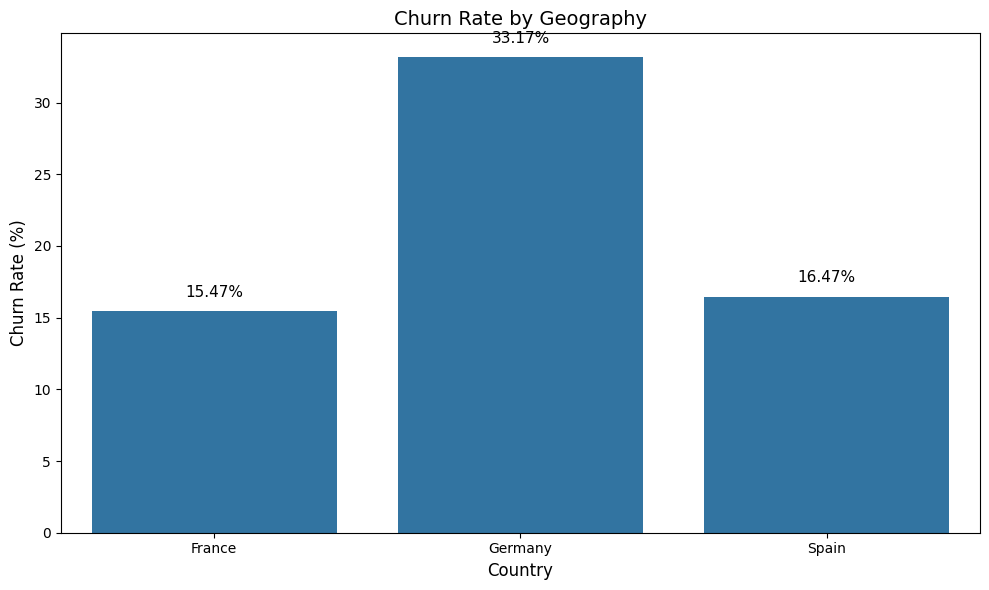

In [ ]:
#8. Create Visualizations
# Visualization 1: Churn Rate by Geography
plt.figure(figsize=(10, 6))
geography_churn_plot = data.groupby('Geography')['Exited'].mean() * 100

ax = sns.barplot(x=geography_churn_plot.index, y=geography_churn_plot.values)
plt.title('Churn Rate by Geography', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xlabel('Country', fontsize=12)

# Add percentage labels on bars
for i, v in enumerate(geography_churn_plot.values):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('geography_churn.png')
plt.show()

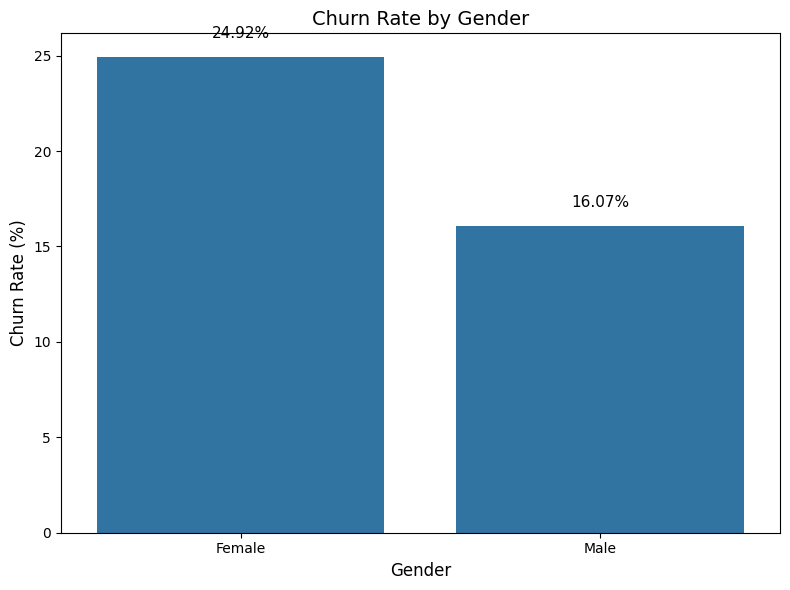

In [ ]:
#8. Create Visualizations
# Visualization 2: Churn Rate by Gender
plt.figure(figsize=(8, 6))
gender_churn_plot = data.groupby('Gender')['Exited'].mean() * 100

ax = sns.barplot(x=gender_churn_plot.index, y=gender_churn_plot.values)
plt.title('Churn Rate by Gender', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
# Add percentage labels on bars
for i, v in enumerate(gender_churn_plot.values):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('gender_churn.png')
plt.show()

<ipython-input-109-a17c5f15a47c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn_plot = data.groupby('AgeGroup')['Exited'].mean() * 100


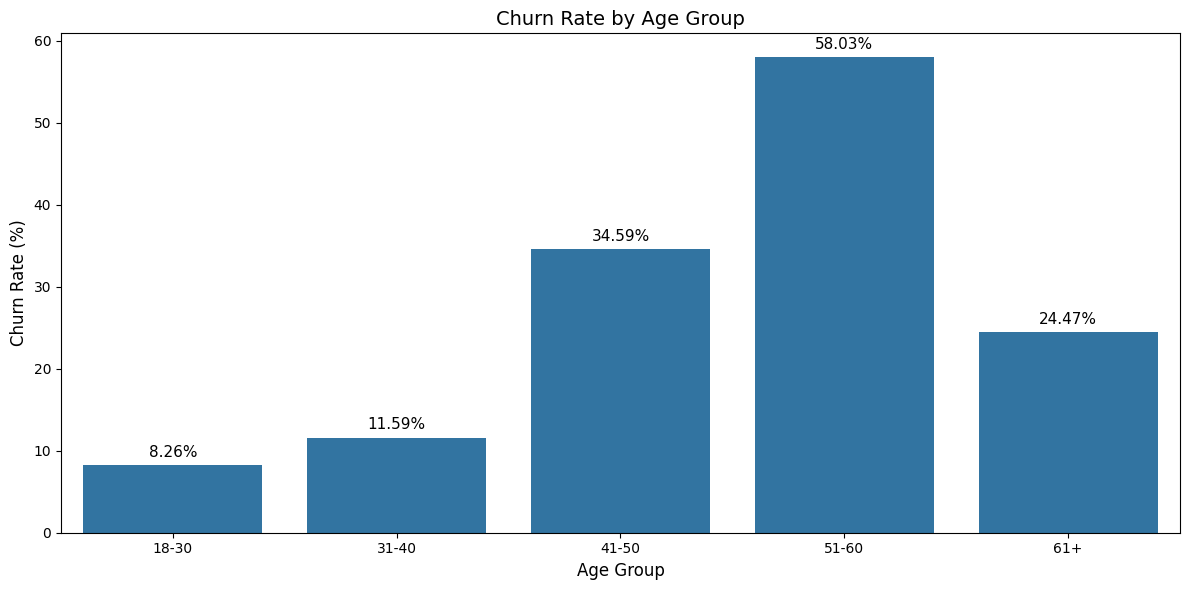

In [ ]:
#8. Create Visualizations
# Visualization 3: Churn Rate by Age Group
plt.figure(figsize=(12, 6))
age_churn_plot = data.groupby('AgeGroup')['Exited'].mean() * 100

ax = sns.barplot(x=age_churn_plot.index, y=age_churn_plot.values)
plt.title('Churn Rate by Age Group', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xlabel('Age Group', fontsize=12)

# Add percentage labels on bars
for i, v in enumerate(age_churn_plot.values):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('age_churn.png')
plt.show()

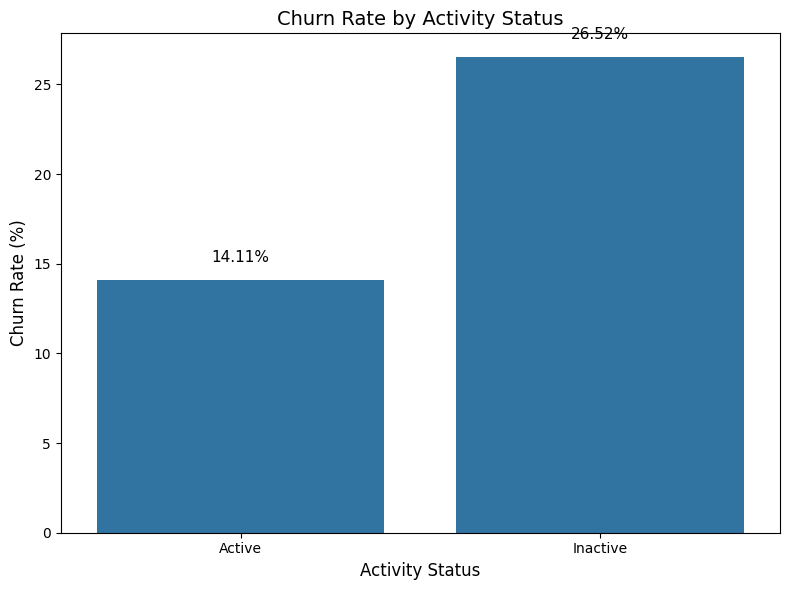

In [ ]:
#8. Create Visualizations
# Visualization 4: Churn Rate by Activity Status
plt.figure(figsize=(8, 6))
activity_labels = {0: 'Inactive', 1: 'Active'}
data['ActivityStatus'] = data['IsActiveMember'].map(activity_labels)
activity_churn_plot = data.groupby('ActivityStatus')['Exited'].mean() * 100

ax = sns.barplot(x=activity_churn_plot.index, y=activity_churn_plot.values)
plt.title('Churn Rate by Activity Status', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xlabel('Activity Status', fontsize=12)

# Add percentage labels on bars
for i, v in enumerate(activity_churn_plot.values):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('activity_churn.png')
plt.show()

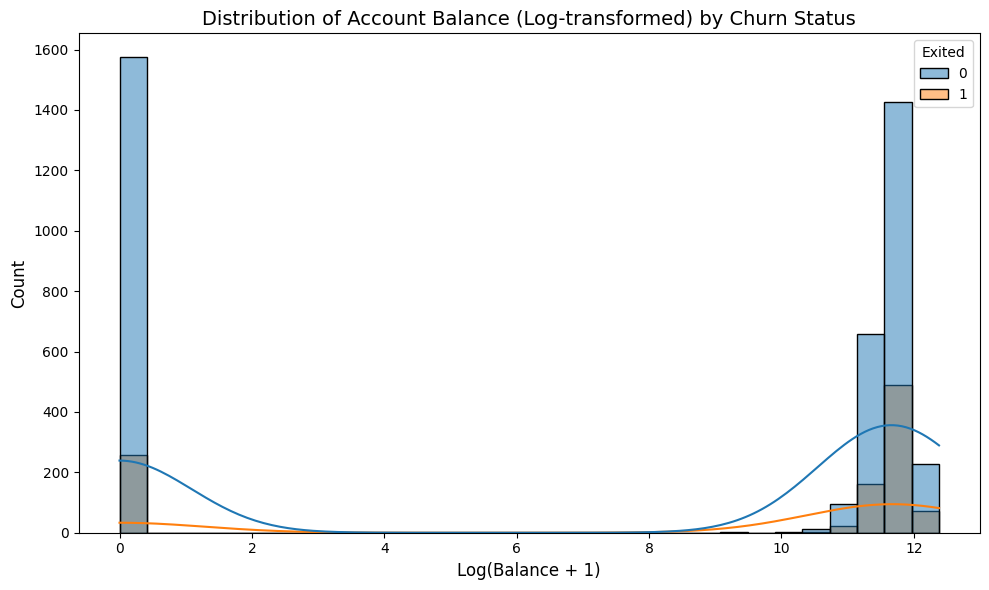

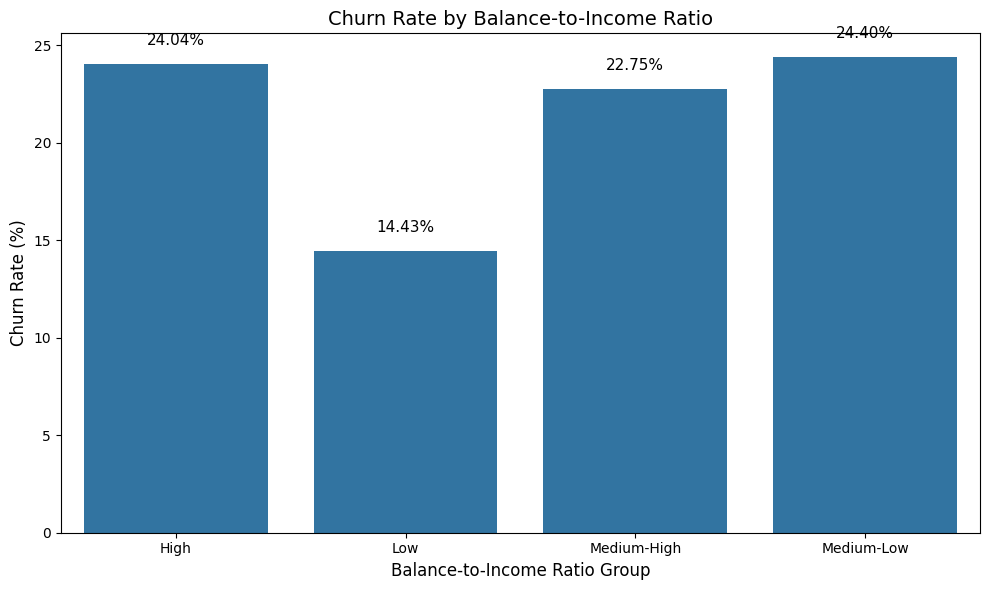

In [ ]:
#8. Create Visualizations
# Visualization 5: Balance Distribution
plt.figure(figsize=(10, 6))
# Log transform balance to handle skewness
data['Balance_log'] = np.log1p(data['Balance'])
sns.histplot(data=data, x='Balance_log', hue='Exited', kde=True, bins=30)
plt.title('Distribution of Account Balance (Log-transformed) by Churn Status', fontsize=14)
plt.xlabel('Log(Balance + 1)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('balance_distribution.png')
plt.show()

# Fix for Balance-to-Income Ratio (Section 10)
# Create balance-to-income ratio
data['BalanceToIncome'] = data['Balance'] / data['EstimatedSalary'].replace(0, np.nan)

# First create the categorical column
data['BalanceToIncomeGroup'] = pd.cut(data['BalanceToIncome'], bins=bins, labels=labels)

# Then handle NaN values differently
data['BalanceToIncomeGroup'] = data['BalanceToIncomeGroup'].astype(str)
data.loc[data['BalanceToIncomeGroup'] == 'nan', 'BalanceToIncomeGroup'] = 'Unknown'

# Visualization 6: Churn by Balance-to-Income Ratio
plt.figure(figsize=(10, 6))
balance_income_churn_plot = data.groupby('BalanceToIncomeGroup')['Exited'].mean() * 100

ax = sns.barplot(x=balance_income_churn_plot.index, y=balance_income_churn_plot.values)
plt.title('Churn Rate by Balance-to-Income Ratio', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xlabel('Balance-to-Income Ratio Group', fontsize=12)

# Add percentage labels on bars
for i, v in enumerate(balance_income_churn_plot.values):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('balance_income_churn.png')
plt.show()

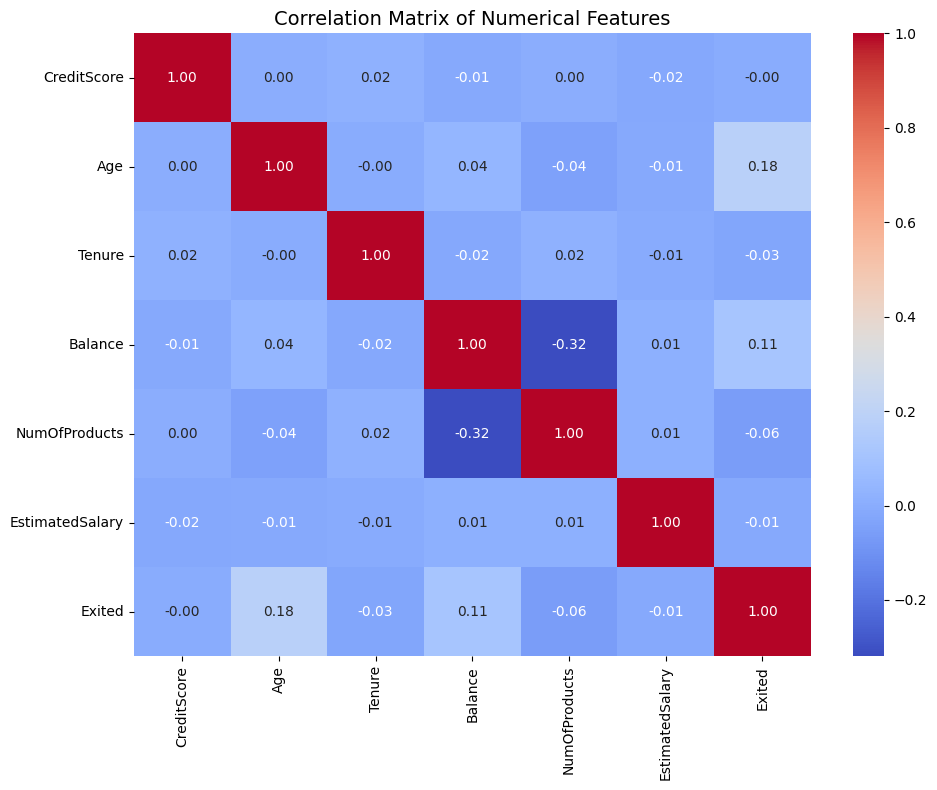

In [ ]:
#8. Create Visualizations
# Correlation analysis and visualization
# Select numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                      'EstimatedSalary', 'Exited']
correlation_matrix = data[numerical_features].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

In [ ]:
#9. Advanced Analysis: Interaction Effect
# Interaction effects analysis
interaction_segments = data.groupby(['Geography', 'Gender', 'IsActiveMember'])['Exited'].mean() * 100
high_risk_segments = interaction_segments[interaction_segments > 40].sort_values(ascending=False)

print("High-risk micro-segments (Churn Rate > 40%):")
print(high_risk_segments)

High-risk micro-segments (Churn Rate > 40%):
Geography  Gender  IsActiveMember
Germany    Female  0                 44.794953
           Male    0                 41.000000
Name: Exited, dtype: float64


In [ ]:
#10. Advanced Analysis: Balance-to-Income Ratio
## Balance-to-Income ratio analysis
# Create balance-to-income ratio
data['BalanceToIncome'] = data['Balance'] / data['EstimatedSalary'].replace(0, np.nan)

# Create groups based on ratio
# Add 'Unknown' as an explicit category in our labels
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
bins = [-np.inf, 0.5, 1.0, 1.5, np.inf]

# First create the categorical column
data['BalanceToIncomeGroup'] = pd.cut(data['BalanceToIncome'], bins=bins, labels=labels)

# Then handle NaN values differently - create a new series with string type
# This converts the categorical to string and then we can replace
data['BalanceToIncomeGroup'] = data['BalanceToIncomeGroup'].astype(str)
data.loc[data['BalanceToIncomeGroup'] == 'nan', 'BalanceToIncomeGroup'] = 'Unknown'

# Analyze churn by groups
balance_ratio_churn = data.groupby('BalanceToIncomeGroup')['Exited'].agg(['count', 'sum'])
balance_ratio_churn['churn_rate'] = balance_ratio_churn['sum'] / balance_ratio_churn['count'] * 100

print("Churn rate by Balance-to-Income ratio:")
print(balance_ratio_churn)

Churn rate by Balance-to-Income ratio:
                      count  sum  churn_rate
BalanceToIncomeGroup                        
High                   1244  299   24.035370
Low                    2003  289   14.428357
Medium-High             589  134   22.750424
Medium-Low             1164  284   24.398625


In [ ]:
#11. Feature Importance with Logistic Regression
# Prepare features and target, handling missing values
X_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
          'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Create an imputer if needed
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(data[X_cols]), columns=X_cols)

# Create dummy variables for categorical features
X_with_dummies = pd.get_dummies(data[['Geography', 'Gender']], drop_first=True)
X = pd.concat([X, X_with_dummies], axis=1)
y = data['Exited']

# Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Feature importance (top 5 positive):")
print(coefficients.head())
print("\nFeature importance (top 5 negative):")
print(coefficients.tail())

Feature importance (top 5 positive):
             Feature   Coefficient
8  Geography_Germany  1.025524e+00
9    Geography_Spain  9.866521e-02
1                Age  2.112683e-02
3            Balance -3.251780e-08
7    EstimatedSalary -1.168989e-06

Feature importance (top 5 negative):
           Feature  Coefficient
2           Tenure    -0.046549
5        HasCrCard    -0.057207
4    NumOfProducts    -0.377387
10     Gender_Male    -0.478770
6   IsActiveMember    -0.899771


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
